<a href="https://colab.research.google.com/github/MAzizDriss/CreditRiskAssessment/blob/main/EDA_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing our libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loan_data_pd=pd.read_csv('/content/drive/MyDrive/Data/credit_risk_dataset.csv')

# Data Understanding

In [ ]:
loan_data_pd.shape

(32581, 12)

In [ ]:
loan_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


1. person_age: is the age of the person at the time of the loan.
2. person_income: is the yearly income of the person at the time of the loan.
3. person_home_ownership: is the type of ownership of the home.
4. person_emp_length: is the amount of time in years that person is employed.
5. loan_intent: is the aim of the loan.
6. loan_grade: is a classification system that involves assigning
 a quality 7.
  score to a loan based on a borrower's credit history, 
 quality of the collateral, and the likelihood of repayment of the principal and interest.
7. loan_amnt: is the dimension of the loan taken.
8. loan_int_rate: is the interest paid for the loan.
9. loan_status: is a dummy variable where 1 is default, 0 is not default.
10. loan_percent_income: is the ratio between the loan taken and the annual income.
11. cb_person_default_on_file: answers whether the person has defaulted before.
12. cb_person_cred_hist_length: represents the number of years of personal history since the first loan taken from that person.

In [ ]:
loan_data_pd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
loan_data_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


**Visualization** We notice here some extreme values in person_age and person_emp_length that doesnt make sense so we are going to deal with them later on

In [ ]:
#Checking the number of samples for default and non default loan_status
num_rows=len(loan_data_pd)
num_D_rows=len(loan_data_pd[loan_data_pd['loan_status']==1])
num_ND_rows=len(loan_data_pd[loan_data_pd['loan_status']==0])
print('The percentage of the people that defaulted the loan(loan_status=1): %2.2f'%(num_D_rows*100/num_rows),'%')
print('The percentage of the people that didnt default their loan(loan_status=0): %2.2f'%(num_ND_rows*100/num_rows),'%')

The percentage of the people that defaulted the loan(loan_status=1): 21.82 %
The percentage of the people that didnt default their loan(loan_status=0): 78.18 %


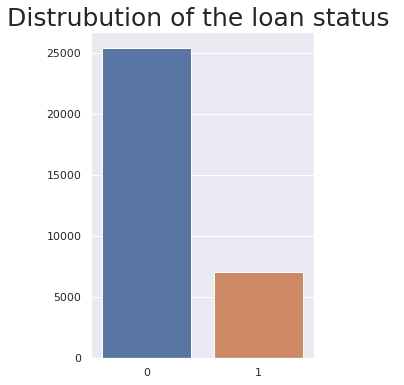

In [ ]:
#Visualizing loan_status distrubition
plt.figure(figsize=(4,6))
sns.barplot(x=[0,1],y=[num_ND_rows,num_D_rows])
plt.title("Distrubution of the loan status ",size=25)
plt.show()

Our data is unbalanced here, That's why when creating our model we have to take this fact into our consideration.

# Dealing with null variables


In [ ]:
loan_data_pd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Null Values:** As we explore the data we see that we have some missing values in the columns person_emp_length and loan_int_rate which are both numeric values which helps us to remplace them with the median value of the other observations.

In [ ]:
#Replacing null values in the column person_emp_length with its median(the value that seprates the data into 2)
loan_data_pd["person_emp_length"].fillna(loan_data_pd["person_emp_length"].median(), inplace=True)

In [ ]:
#Replacing null values in the column loan_int_rate with its median value:
loan_data_pd["loan_int_rate"].fillna(loan_data_pd["loan_int_rate"].median(), inplace=True)

In [ ]:
loan_data_pd.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

As we see here we got rid of all the missing values in our Data.

In [ ]:
duplicated=loan_data_pd.duplicated()
duplicated[duplicated==True]

15975    True
15989    True
15995    True
16025    True
16028    True
         ... 
32010    True
32047    True
32172    True
32259    True
32279    True
Length: 165, dtype: bool

In [ ]:
loan_data_pd=loan_data_pd.drop_duplicates()

#Exploring loan grades classes

In [ ]:
#Seeing how many grades we have
loan_data_pd['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

<Figure size 1080x432 with 0 Axes>

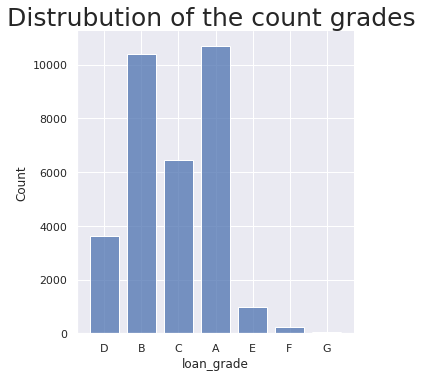

In [ ]:
plt.figure(figsize=(15,6))
sns.displot(loan_data_pd,x='loan_grade',shrink=.8)
plt.title("Distrubution of the count grades ",size=25)
plt.show()

**VISUALIZATION :**

We notice at first that the distrubition of our grade classes are unbalanced across our data.

 Then we see here that the number of the G grades is too negligable compared to the other grades.

In [ ]:
percentage_grade_G=len(loan_data_pd[loan_data_pd['loan_grade']=='G'])/len(loan_data_pd)
print('The percentage of the grade G in the Dataset is :%1.2f'%(percentage_grade_G*100),'%')

The percentage of the grade G in the Dataset is :0.20 %


In [ ]:
G_data=loan_data_pd[loan_data_pd['loan_grade']=='G']
print('The risk of going on default for class G is :%2.2f'%(len(G_data[G_data['loan_status']==1])/len(G_data)*100),'%')

The risk of going on default for class G is :98.44 %


But we notice that the class G has the highest risk of going on default. Thats why we need to visualize the risk by Grade graph to better understand, and get a closer look at our Data.

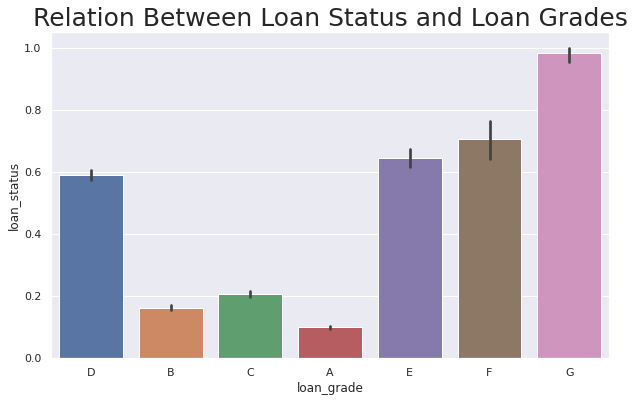

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=loan_data_pd["loan_grade"],y=loan_data_pd["loan_status"])
plt.title("Relation Between Loan Status and Loan Grades", size=25)
plt.show()

**Interpretation** As we see in this plot. These classes represent the rate of the risk of not returning the loan. We notice by this graph that the "A" class represents the  class with the **lowest risk** while class G has the **highest risk** on deafaulting their debt.

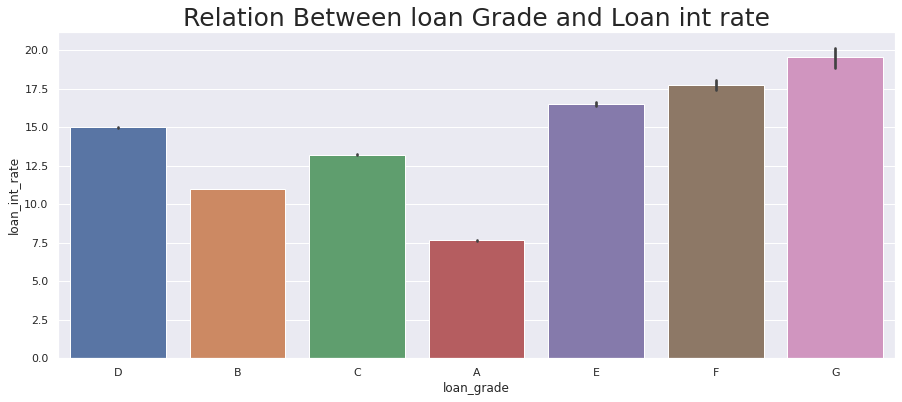

In [ ]:
#Seeing the loan Grade vs loan_int graph
plt.figure(figsize=(15,6))
sns.barplot(x=loan_data_pd["loan_grade"],y=loan_data_pd["loan_int_rate"])
plt.title("Relation Between loan Grade and Loan int rate", size=25)
plt.show()

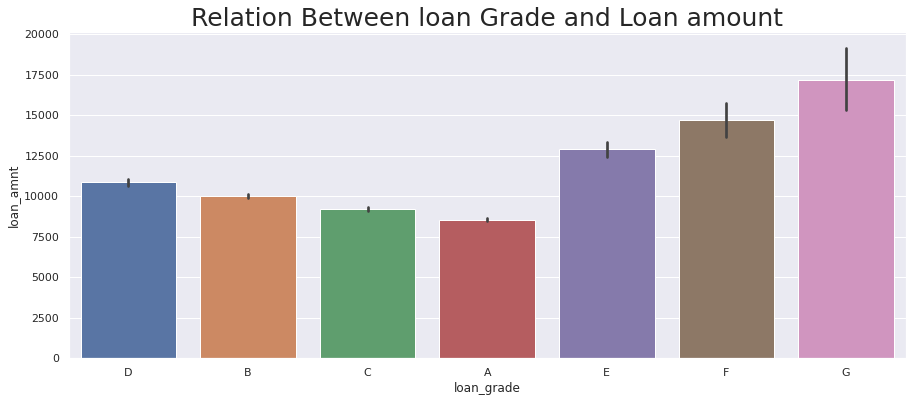

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=loan_data_pd["loan_grade"],y=loan_data_pd["loan_amnt"])
plt.title("Relation Between loan Grade and Loan amount", size=25)
plt.show()

# Exploring the other non numerical variables

In [ ]:
#Seeing what are the loan intents
loan_data_pd['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

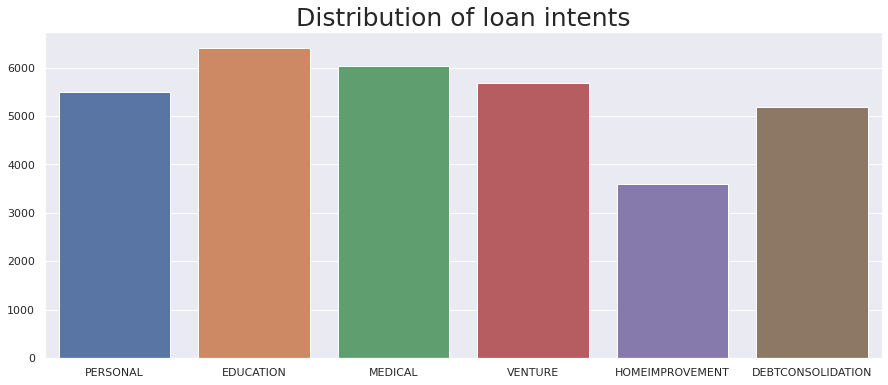

In [ ]:
#Distrubition of loan intents
Y=[]
for intent in loan_data_pd['loan_intent'].unique():
  Y.append(len(loan_data_pd[loan_data_pd['loan_intent']==intent]))
plt.figure(figsize=(15,6))
sns.barplot(x=loan_data_pd['loan_intent'].unique(),y=Y)
plt.title("Distribution of loan intents", size=25)
plt.show()

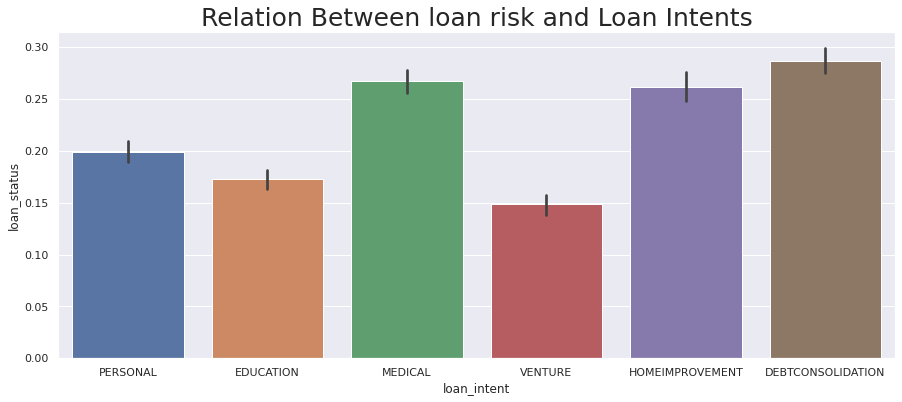

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=loan_data_pd["loan_intent"],y=loan_data_pd["loan_status"])
plt.title("Relation Between loan risk and Loan Intents", size=25)
plt.show()

**Interpretation** We see that the people who risk to default the loan are the people that have previous debts which makes a lot of sense.

In [ ]:
#Seeing the types of home ownership
loan_data_pd['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

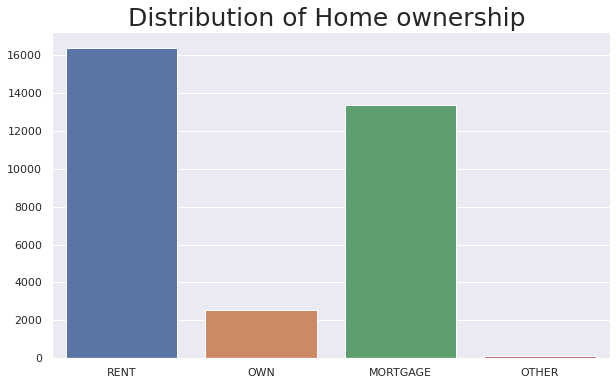

In [ ]:
#Distrubition of loan intents
Y=[]
for item in loan_data_pd['person_home_ownership'].unique():
  Y.append(len(loan_data_pd[loan_data_pd['person_home_ownership']==item]))
plt.figure(figsize=(10,6))
sns.barplot(x=loan_data_pd['person_home_ownership'].unique(),y=Y)
plt.title("Distribution of Home ownership ", size=25)
plt.show()

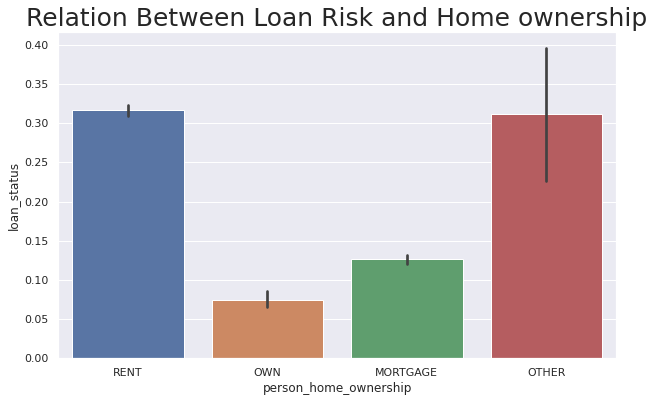

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=loan_data_pd["person_home_ownership"],y=loan_data_pd["loan_status"])
plt.title("Relation Between Loan Risk and Home ownership", size=25)
plt.show()

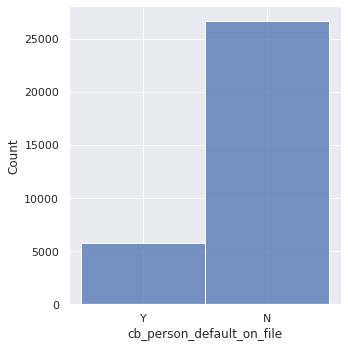

In [ ]:
loan_data_pd['cb_person_default_on_file'].unique()
sns.displot(loan_data_pd,x='cb_person_default_on_file')

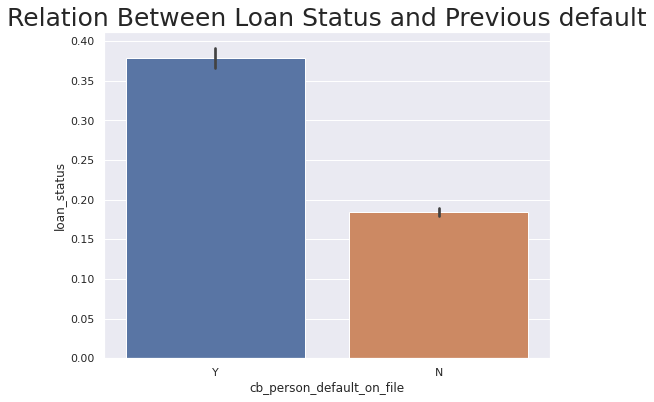

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=loan_data_pd["cb_person_default_on_file"],y=loan_data_pd["loan_status"])
plt.title("Relation Between Loan Status and Previous default", size=25)
plt.show()

**Visualization and Interpretation** We see that the number of the people who have defaulted their loan before are high likely to default them again which makes sense.

# Dealing with outliers

In [ ]:
def plot_boxplot(df,feature):
  plt.figure(figsize=(8,8))
  df.boxplot(column=[feature])
  plt.title("Boxplot", size=25)
  plt.show()

In [ ]:
def Distrubution_plot(df,feature):
  plt.figure(figsize=(10,6))
  sns.displot(df,x=feature)
  print(df[feature].var())
  plt.show()

In [ ]:
def Detailed_Distrubution_plot(df,feature):
  unique_values=loan_data_pd[feature].unique()
  count_values =[]
  for v in unique_values:
    count_values.append(len(df[df[feature]==v]))
  plt.figure(figsize=(15,6))
  sns.barplot(x=unique_values,y=count_values)
  title="Distribution of "+feature
  plt.title(title, size=35)
  plt.show()

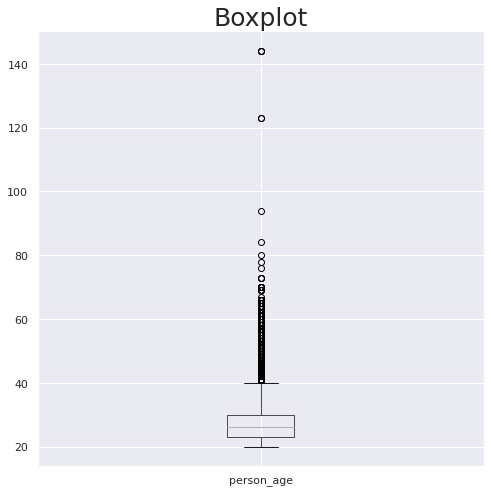

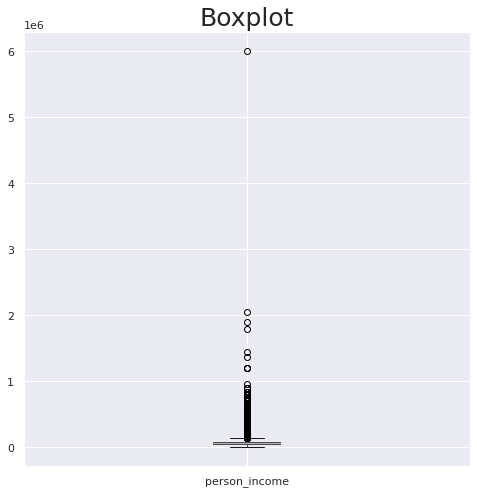

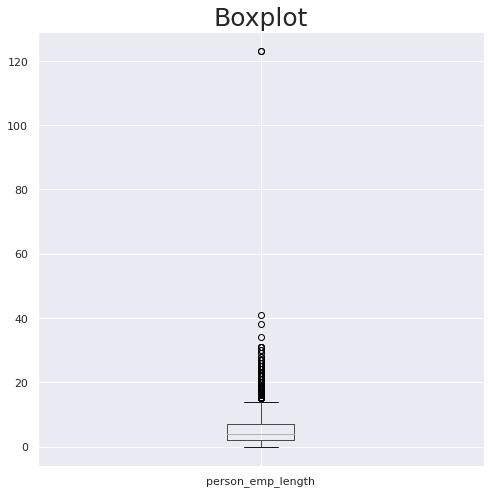

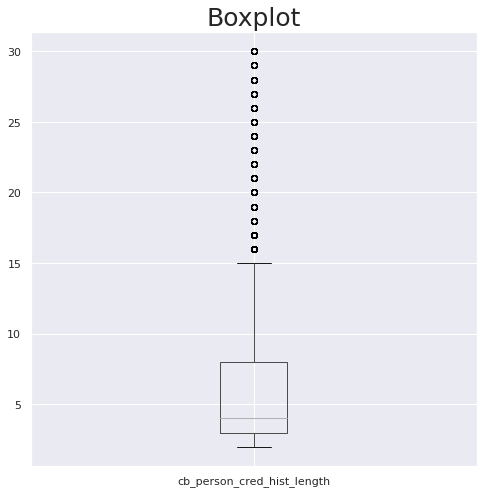

In [ ]:
#Features that are more sus to have outliers
list_feature=["person_age","person_income","person_emp_length","cb_person_cred_hist_length"]
for col in list_feature:
  plot_boxplot(loan_data_pd,col)
#Check it again remove >2

40.37458614043183


<Figure size 720x432 with 0 Axes>

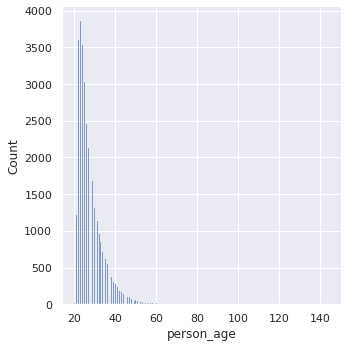

3845932196.087865


<Figure size 720x432 with 0 Axes>

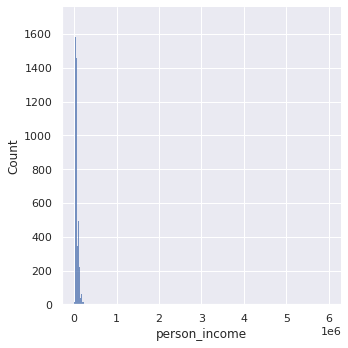

16.731465238496096


<Figure size 720x432 with 0 Axes>

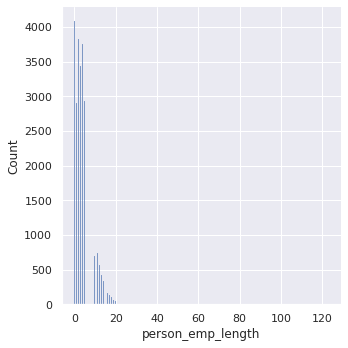

16.47572738172921


<Figure size 720x432 with 0 Axes>

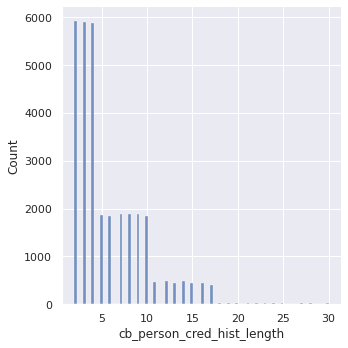

In [ ]:
for col in list_feature:
  Distrubution_plot(loan_data_pd,col)

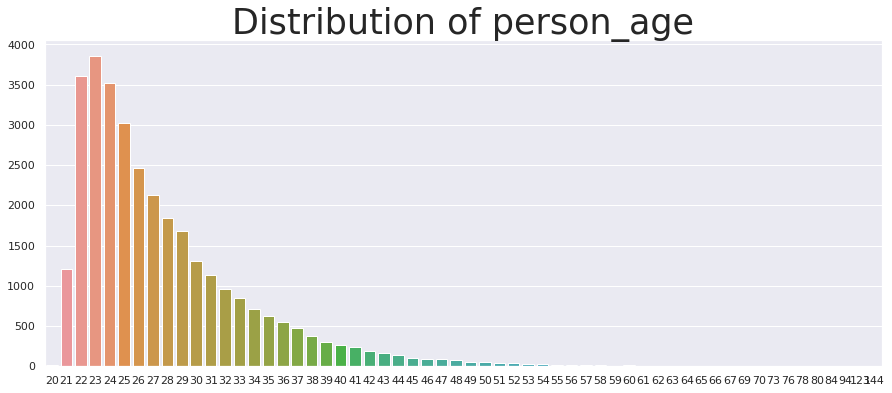

In [ ]:
Detailed_Distrubution_plot(loan_data_pd,'person_age')

In [ ]:
from math import ceil,floor
def remove_outliers_default(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, ceil(upper_range), df[col])
    df[col] = np.where(df[col]<lower_range, floor(lower_range), df[col])

In [ ]:
def remove_outliers_feature(df,col,lower_range,upper_range):
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])

In [ ]:
remove_outliers_feature(loan_data_pd,"person_age",20,80)
remove_outliers_feature(loan_data_pd,"person_income",0,2e6)
remove_outliers_feature(loan_data_pd,"person_emp_length",0,23)
remove_outliers_feature(loan_data_pd,"cb_person_cred_hist_length",0,18)

In [ ]:
#for col in list_feature:
    #remove_outliers_default(loan_data_pd, col)

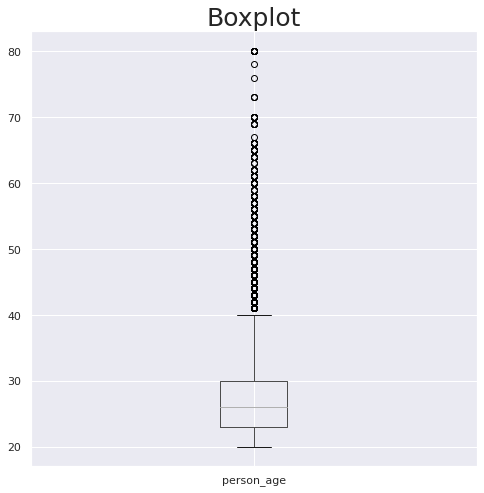

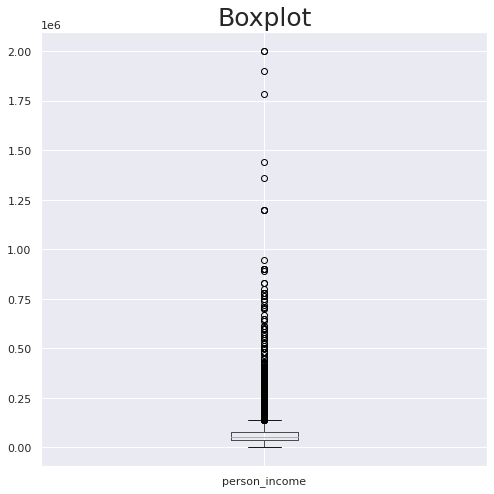

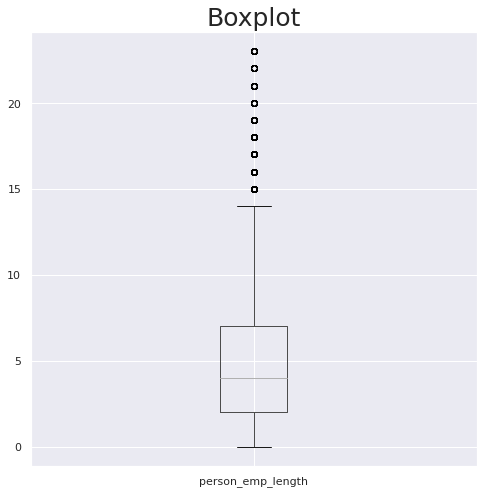

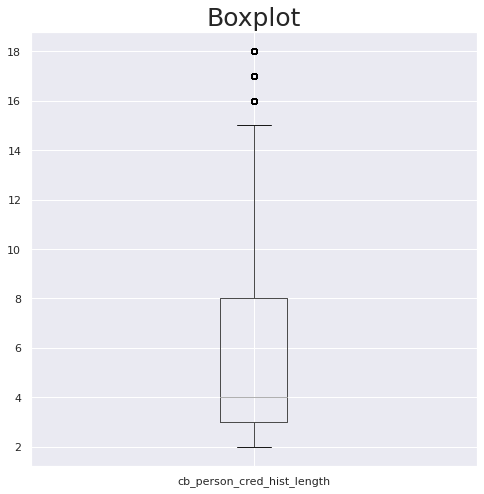

In [ ]:
for col in list_feature:
  plot_boxplot(loan_data_pd,col)

# Visualizing Data

In [ ]:
len(loan_data_pd)

32416

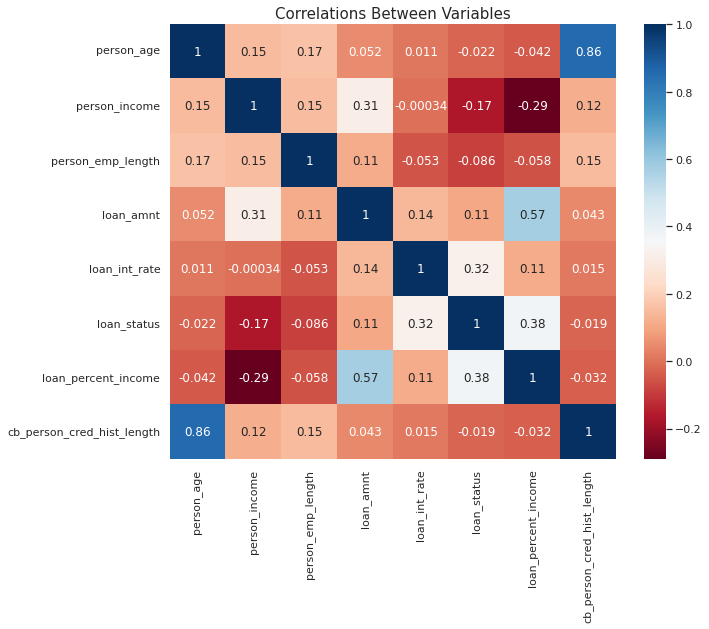

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(loan_data_pd.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

38.92049160599793


<Figure size 720x432 with 0 Axes>

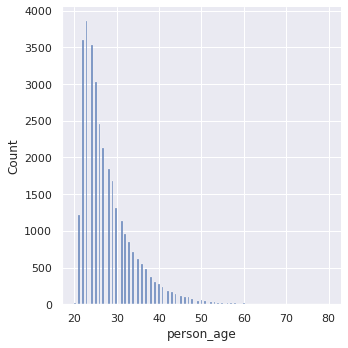

In [ ]:
Distrubution_plot(loan_data_pd,'person_age')

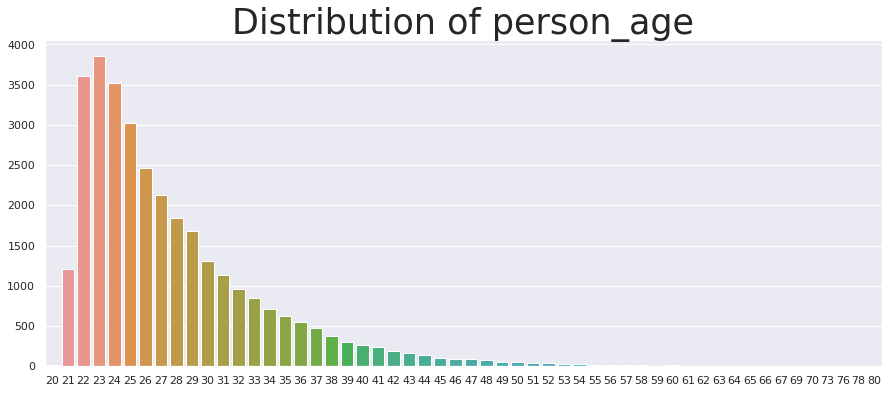

In [ ]:
Detailed_Distrubution_plot(loan_data_pd,'person_age')

2870234824.1619654


<Figure size 720x432 with 0 Axes>

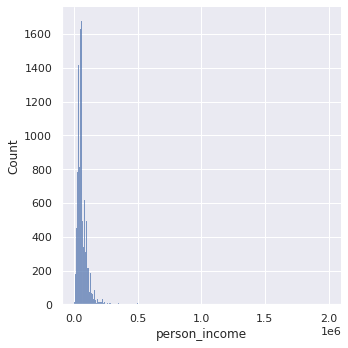

In [ ]:
Distrubution_plot(loan_data_pd,'person_income')
#Doesnt make sense change it with log

15.652067476308877


<Figure size 720x432 with 0 Axes>

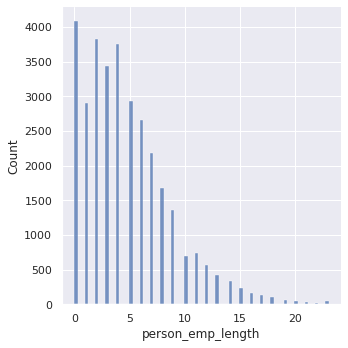

In [ ]:
Distrubution_plot(loan_data_pd,'person_emp_length')

39976917.69870784


<Figure size 720x432 with 0 Axes>

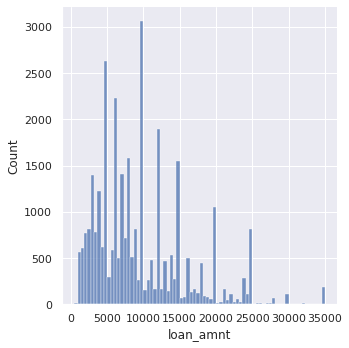

In [ ]:
Distrubution_plot(loan_data_pd,'loan_amnt')

9.505200175670486


<Figure size 720x432 with 0 Axes>

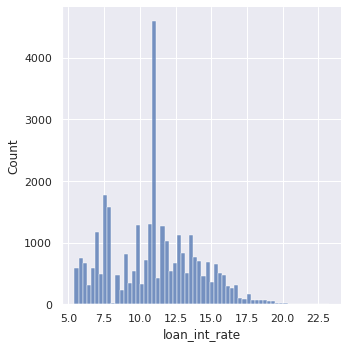

In [ ]:
Distrubution_plot(loan_data_pd,'loan_int_rate')

0.011408797655390431


<Figure size 720x432 with 0 Axes>

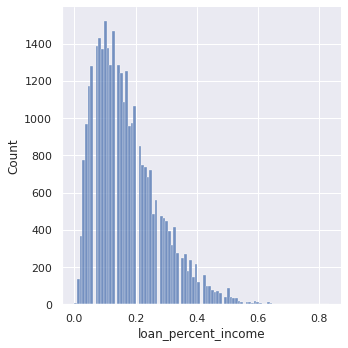

In [ ]:
Distrubution_plot(loan_data_pd,'loan_percent_income')

This feature has low variance and has a high correlation + is calculable with 2 variables. It has to be removed in our model later on

14.805729492382039


<Figure size 720x432 with 0 Axes>

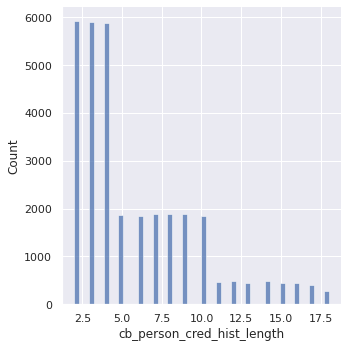

In [ ]:
Distrubution_plot(loan_data_pd,'cb_person_cred_hist_length')

0.31986659162961856


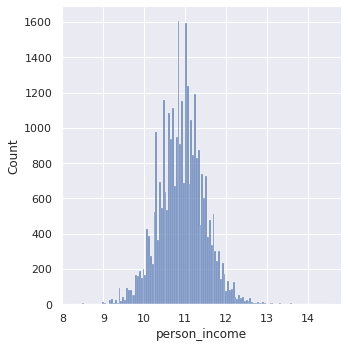

In [ ]:
#Visualizing the plot of log(person_income)
sns.displot(loan_data_pd['person_income'].apply(lambda x :np.log(x)))
print(loan_data_pd['person_income'].apply(lambda x :np.log(x)).var())

In [ ]:
from google.colab import files
loan_data_pd.to_csv('creditrisk_DT.csv') 
files.download('creditrisk_DT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Transforming Non Numerical features

In [ ]:
# one hot encoding categorical variables
num_col = loan_data_pd.select_dtypes(exclude = 'object')
char_col = loan_data_pd.select_dtypes(include = 'object')

encoded_char_col = pd.get_dummies(char_col)
loan_data_clean= pd.concat([num_col, encoded_char_col], axis=1)
loan_data_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000.0,23.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600.0,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600.0,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500.0,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400.0,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000.0,1.0,5800,13.16,0,0.11,18,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000.0,4.0,17625,7.49,0,0.15,18,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000.0,3.0,35000,10.99,1,0.46,18,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000.0,5.0,15000,11.48,0,0.10,18,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32416 non-null  int64  
 1   person_income                   32416 non-null  float64
 2   person_emp_length               32416 non-null  float64
 3   loan_amnt                       32416 non-null  int64  
 4   loan_int_rate                   32416 non-null  float64
 5   loan_status                     32416 non-null  int64  
 6   loan_percent_income             32416 non-null  float64
 7   cb_person_cred_hist_length      32416 non-null  int64  
 8   person_home_ownership_MORTGAGE  32416 non-null  uint8  
 9   person_home_ownership_OTHER     32416 non-null  uint8  
 10  person_home_ownership_OWN       32416 non-null  uint8  
 11  person_home_ownership_RENT      32416 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

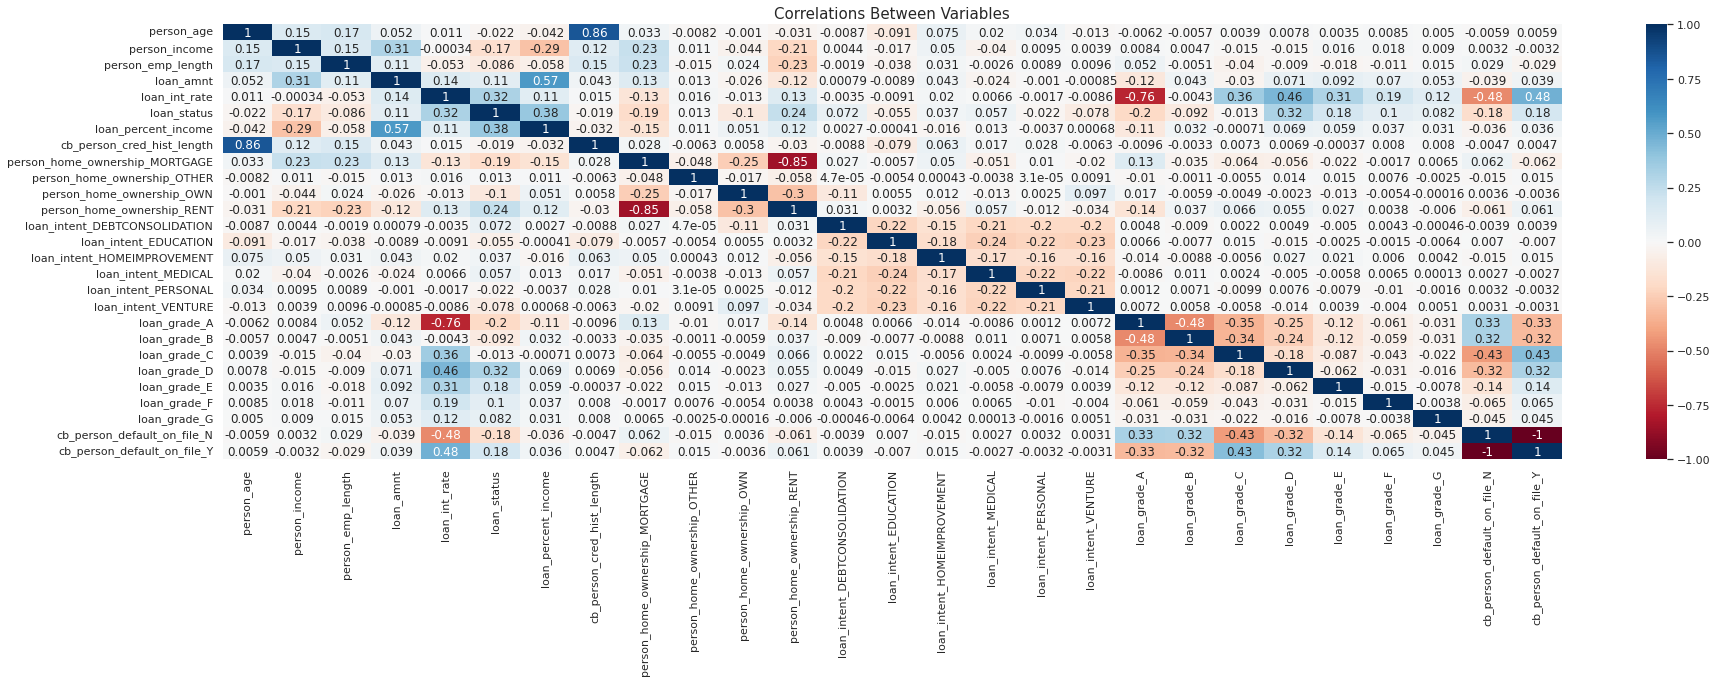

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(loan_data_clean.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
from google.colab import files
loan_data_clean.to_csv('creditrisk.csv') 
files.download('creditrisk.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>